In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint
import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(query_url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=hobart
Processing record 2 of set 0 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=georgetown
Processing record 3 of set 0 | misratah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=misratah
Processing record 4 of set 0 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=tual
Processing record 5 of set 0 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=yellowknife
Processing record 6 of set 0 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=cape town
Processing re

Processing record 3 of set 1 | onguday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=onguday
Processing record 4 of set 1 | manadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=manadhoo
Processing record 5 of set 1 | wendo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=wendo
Processing record 6 of set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=bluff
Processing record 7 of set 1 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=nizhneyansk
City not found!
Processing record 8 of set 1 | volchansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=volchansk
Processing record 9 of set 1 | soledad
http://api.openweathermap.org/data/2.5/

Processing record 5 of set 2 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=caravelas
Processing record 6 of set 2 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=nhulunbuy
Processing record 7 of set 2 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=isangel
Processing record 8 of set 2 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=coquimbo
Processing record 9 of set 2 | pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=pimentel
Processing record 10 of set 2 | santa marta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=santa marta
Processing record 11 of set 2 | atar
http://api.openweathermap.org/data/2.5/wea

Processing record 7 of set 3 | sulangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=sulangan
Processing record 8 of set 3 | chacabuco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=chacabuco
Processing record 9 of set 3 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=leh
Processing record 10 of set 3 | poso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=poso
Processing record 11 of set 3 | krasnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=krasnyy
Processing record 12 of set 3 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=nikolskoye
Processing record 13 of set 3 | grand centre
http://api.openweathermap.org/data/2.5/weather?units=I

Processing record 9 of set 4 | macaboboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=macaboboni
City not found!
Processing record 10 of set 4 | pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=pangody
Processing record 11 of set 4 | simala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=simala
Processing record 12 of set 4 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=ulladulla
Processing record 13 of set 4 | steinbach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=steinbach
Processing record 14 of set 4 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=pangnirtung
Processing record 15 of set 4 | saint anthony
http://api.op

Processing record 11 of set 5 | dolores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=dolores
Processing record 12 of set 5 | galiwinku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=galiwinku
City not found!
Processing record 13 of set 5 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=makakilo city
Processing record 14 of set 5 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=buraydah
Processing record 15 of set 5 | matsanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=matsanga
City not found!
Processing record 16 of set 5 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=katsuura
Processing record 17 of set 5 | maneader

Processing record 14 of set 6 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=vestmannaeyjar
Processing record 15 of set 6 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=severo-kurilsk
Processing record 16 of set 6 | ekhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=ekhabi
Processing record 17 of set 6 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=aklavik
Processing record 18 of set 6 | grafton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=grafton
Processing record 19 of set 6 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=cockburn town
Processing record 20 of set 6 | fairbanks
http://api.ope

Processing record 16 of set 7 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=tocopilla
Processing record 17 of set 7 | katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=katobu
Processing record 18 of set 7 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=margate
Processing record 19 of set 7 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=rocha
Processing record 20 of set 7 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=raudeberg
Processing record 21 of set 7 | tim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=tim
Processing record 22 of set 7 | hounde
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing record 19 of set 8 | pushkinskiye gory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=pushkinskiye gory
Processing record 20 of set 8 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=klaksvik
Processing record 21 of set 8 | pestretsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=pestretsy
Processing record 22 of set 8 | boueni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=boueni
Processing record 23 of set 8 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=muros
Processing record 24 of set 8 | ellisras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=ellisras
Processing record 25 of set 8 | cruden bay
http://api.openweathermap.org

Processing record 21 of set 9 | bhabua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=bhabua
Processing record 22 of set 9 | sebinkarahisar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=sebinkarahisar
Processing record 23 of set 9 | svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=svetlyy
Processing record 24 of set 9 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=itarema
Processing record 25 of set 9 | mago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=mago
Processing record 26 of set 9 | zolotinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=zolotinka
City not found!
Processing record 27 of set 9 | warwick
http://api.openweathermap.or

Processing record 23 of set 10 | nampa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=nampa
Processing record 24 of set 10 | ekibastuz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=ekibastuz
Processing record 25 of set 10 | lecce
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=lecce
Processing record 26 of set 10 | storsteinnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=storsteinnes
Processing record 27 of set 10 | cockburn harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=cockburn harbour
City not found!
Processing record 28 of set 10 | jiroft
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc40273bbbf4cb8e9aee7fe659e2f605&q=jiroft
City not found!
Processing record 29 of set 10 | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Temp          523
Lat           523
Lng           523
Wind Speed    523
dtype: int64

In [8]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,hobart,75,AU,1581624394,87,61.00,-42.88,147.33,5.82
1,georgetown,20,MY,1581624603,88,80.60,5.41,100.34,2.73
2,misratah,100,LY,1581624376,73,61.70,32.38,15.09,2.95
3,tual,74,ID,1581624427,78,82.89,-5.67,132.75,11.03
4,yellowknife,90,CA,1581624437,76,-2.00,62.46,-114.35,9.17


In [9]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

In [10]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

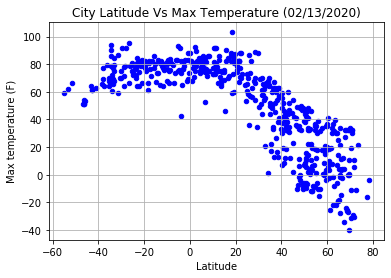

In [11]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='Blue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig('Images/LatitudeVsTemperature.png')

#### Latitude vs. Humidity Plot

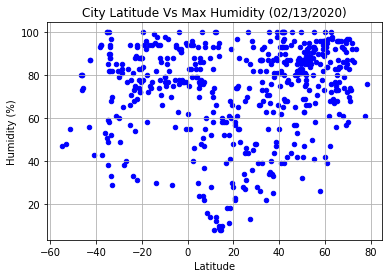

In [12]:
# Latitude Vs Humidity

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='Blue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Images/LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

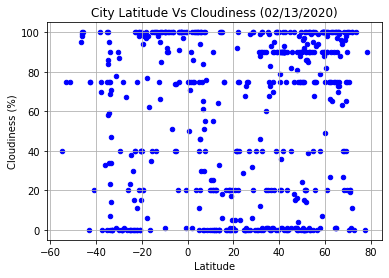

In [13]:

# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='Blue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Images/LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

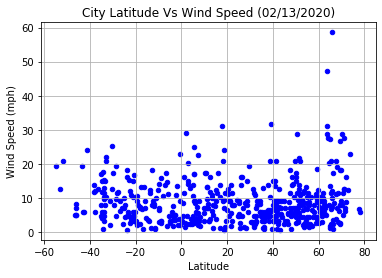

In [14]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='Blue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/LatitudeVsWindSpeed.png")